# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [58]:
import re
import pandas as pd

In [4]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [62]:
standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   도착 시군구 코드  25 non-null     int64 
 1   자치구        25 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [5]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [31]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

df_seoul_bus_station = pd.read_csv("df_seoul_bus_station.csv",index_col = 0)
df_seoul_moving = pd.read_csv("df_seoul_moving.csv")
df_seoul_business = pd.read_csv("df_seoul_business.csv",index_col = 0)
df_seoul_people = pd.read_csv("df_seoul_people.csv",index_col = 0)

In [32]:
df_seoul_bus_station.head(2)

,자치구,버스정류장수,노선개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065


In [33]:
df_seoul_moving.head(2)

,도착 시군구 코드,이동시간합계,이동인구합계,평균이동시간,평균이동인구
0,11010,10239340,19809988.63,21.443330,41.486279
1,11020,10285410,20275545.43,21.166269,41.724896


In [34]:
df_seoul_people.head(2)

,자치구,남자인구,여자인구
3,종로구,74018,79666
4,중구,63869,67581


In [35]:
df_seoul_business.head(2)

,자치구,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
2,종로구,215,"5,912",646,889,480,"3,613",962,"1,413",382,"1,982"
20,중구,235,"6,414",333,"1,152",816,"3,542","24,248",982,175,"2,121"


In [68]:
st1 = pd.merge(standard,df_seoul_business)
st1_n = st1.drop('자치구', axis=1)

for col in st1_n.columns:
    st1_n[col] = st1_n[col].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
st1_n = st1_n.astype(int)


In [73]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
stt = pd.merge(standard,df_seoul_bus_station)
st2 = pd.merge(stt,df_seoul_moving)
st3 = pd.merge(st2,df_seoul_people)
st4 = pd.merge(st3,st1_n)
st4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          25 non-null     int64  
 1   자치구                25 non-null     object 
 2   버스정류장수             25 non-null     int64  
 3   노선개수               25 non-null     int64  
 4   승차총승객수             25 non-null     int64  
 5   하차총승객수             25 non-null     int64  
 6   승차평균승객수            25 non-null     float64
 7   하차평균승객수            25 non-null     float64
 8   이동시간합계             25 non-null     int64  
 9   이동인구합계             25 non-null     float64
 10  평균이동시간             25 non-null     float64
 11  평균이동인구             25 non-null     float64
 12  남자인구               25 non-null     int64  
 13  여자인구               25 non-null     int64  
 14  택시운송업.1            25 non-null     int32  
 15  한식 일반 음식점업.1       25 non-null     int32  
 16  용달 화물자동차 운송업.1     25 non-nu

In [74]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
st4.corr()

,도착 시군구 코드,버스정류장수,노선개수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동시간합계,이동인구합계,평균이동시간,...,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.281161,0.478837,0.519835,...,0.255924,0.308156,0.223808,0.581968,0.506277,0.267956,-0.157478,0.318339,0.504141,0.342618
버스정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.397518,0.358511,0.219452,...,0.215670,0.146445,0.171907,0.320211,0.344539,0.209808,-0.418222,0.315121,0.293698,0.291643
노선개수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,0.350980,0.220431,-0.687405,...,-0.658988,0.413556,-0.566670,0.077790,0.105499,0.425180,0.282179,0.262016,-0.058862,0.264624
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.595533,0.577177,-0.130036,...,-0.279193,0.574076,-0.190353,0.562383,0.550024,0.530386,-0.024010,0.493852,0.404332,0.522268
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.590166,0.560022,-0.115611,...,-0.259460,0.538578,-0.141275,0.532697,0.519330,0.494266,-0.051134,0.485755,0.372778,0.491315
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,0.117840,0.066854,-0.388197,...,-0.741656,0.257629,-0.463194,0.129694,0.055700,0.204745,0.114406,0.220043,-0.145105,0.073557
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,0.132691,0.062656,-0.360495,...,-0.702574,0.212645,-0.377185,0.102373,0.029836,0.160374,0.059175,0.227213,-0.174517,0.043023
이동시간합계,0.281161,0.397518,0.350980,0.595533,0.590166,0.117840,0.132691,1.000000,0.934031,-0.142137,...,-0.172288,0.801786,-0.137276,0.719803,0.674610,0.819395,0.259637,0.669568,0.543805,0.839105
이동인구합계,0.478837,0.358511,0.220431,0.577177,0.560022,0.066854,0.062656,0.934031,1.000000,0.045704,...,-0.052837,0.867454,-0.122831,0.879176,0.841779,0.869660,0.261426,0.680694,0.742791,0.916056
평균이동시간,0.519835,0.219452,-0.687405,-0.130036,-0.115611,-0.388197,-0.360495,-0.142137,0.045704,1.000000,...,0.788995,-0.181781,0.659852,0.185644,0.165586,-0.235066,-0.283429,-0.067137,0.226569,-0.024703


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 남자인구와 여자인구간의 

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [88]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'cmb10',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'cmtt10',
 'cmex10',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmsy10',
 'cmss10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmmi10',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'cmr10',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'Wingdings 3',
 'HYPMokGak-Bold',
 'Cambria',
 'Berlin Sans FB',
 'Times New Roman',
 'Franklin Gothic Medium',
 'Gill Sans Ultra Bold Condensed',
 'Berlin Sans FB',
 'Bradley Hand ITC',
 'Comic Sans MS',
 'Century',
 'Lucida Sans Unicode',
 'Perpetua',
 'Rockwell',
 'Sitka Small',
 'Garamond',
 'Elephant',
 'Arial',
 'Corbel',
 'Trebuchet

In [90]:

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\GillSansItNova.ttf',
 'C:\\Windows\\Fonts\\BASKVILL.TTF',
 'C:\\Windows\\Fonts\\WINGDNG3.TTF',
 'C:\\Windows\\Fonts\\BIZ-UDGothicR.ttc',
 'C:\\Windows\\Fonts\\consolab.ttf',
 'C:\\Windows\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\PER_____.TTF',
 'C:\\Windows\\Fonts\\simfang.ttf',
 'C:\\Windows\\Fonts\\gautamib.ttf',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\HMFMMUEX.TTC',
 'C:\\Windows\\Fonts\\arialbi.ttf',
 'C:\\Windows\\Fonts\\NanumGothic.otf',
 'C:\\Windows\\Fonts\\kalinga.ttf',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\RockwellNovaCond-BoldItalic.ttf',
 'C:\\Windows\\Fonts\\VerdanaPro-CondLightItalic.ttf',
 'C:\\Windows\\Fonts\\NHaasGroteskTXPro-75Bd.ttf',
 'C:\\Windows\\Fonts\\GillSansCondUltraBoNova.ttf',
 'C:\\Windows\\Fonts\\vijaya.ttf',
 'C:\\Windows\\Fonts\\GeorgiaPro-CondItalic.ttf',
 'C:\\Windows\\Fonts\\KhmerUIb.ttf',
 'C:\\Windows\\Fonts\\REFSAN.TTF',
 'C:\\Windows\\Fonts\\D2Coding-Ver1.3.2-20180524-ligature.ttc',
 'C

In [85]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     
plt.rcParams['font.family'] = 'NanumGothic'

In [94]:

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/D2Coding-Ver1.3.2-20180524.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


C:\Users\User\AppData\Local\Temp\ipykernel_2596\1679296290.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [76]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

NameError: name 'X' is not defined

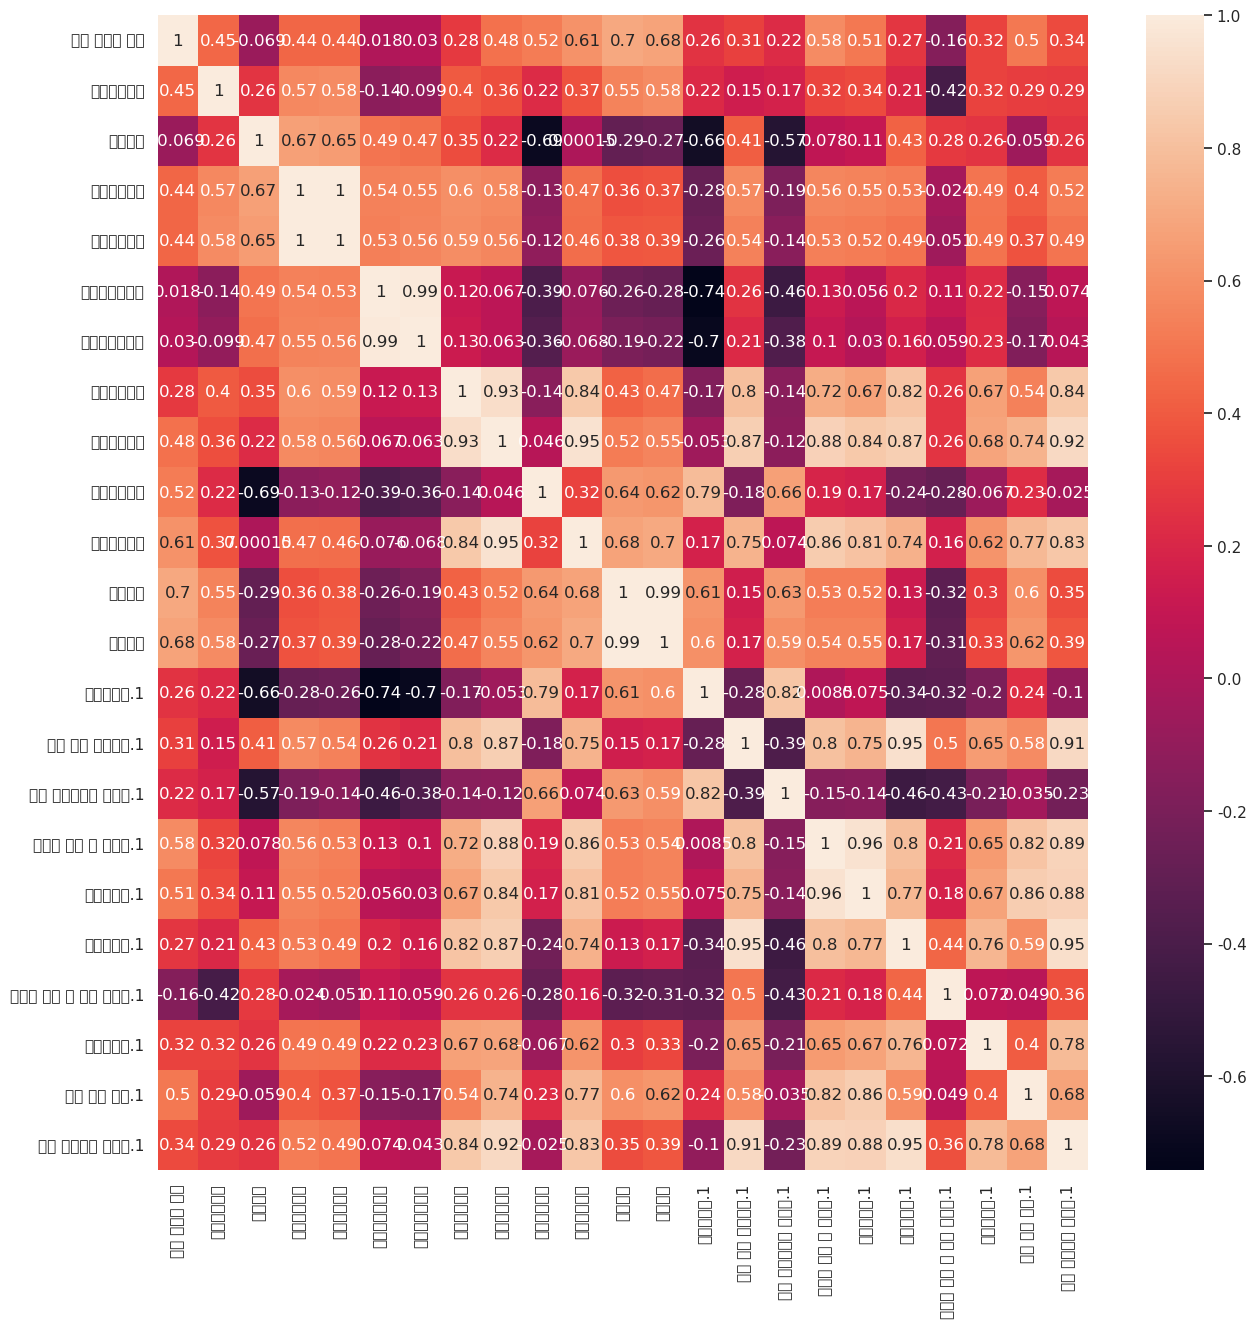

In [95]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(15,15))
sns.heatmap(st4.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?